In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
n_points = 3500
time_index = pd.date_range(start='2020-01-01', periods=n_points, freq='h')
trend1 = np.linspace(0, 100, n_points)
seasonality_daily1 = 10 * np.sin(np.linspace(0, 4 * np.pi * n_points / 24, n_points))
noise1 = np.random.normal(0, 2, n_points)
feature1 = trend1 + seasonality_daily1 + noise1
trend2 = np.linspace(50, 150, n_points) * np.sin(np.linspace(0, np.pi/2, n_points)) 
seasonality_weekly2 = 15 * np.cos(np.linspace(0, 2 * np.pi * n_points / (24*7), n_points))
noise2 = np.random.normal(0, 3, n_points)
feature2 = trend2 + seasonality_weekly2 + noise2
feature3 = np.zeros(n_points)
feature3[0] = 50
monthly_cycles = 1 * np.sin(np.linspace(0, 2 * np.pi * n_points / (24*30), n_points)) 
for i in range(1, n_points):
    feature3[i] = 0.7 * feature3[i-1] + 10 + monthly_cycles[i] + np.random.normal(0, 5)
trend4 = np.exp(np.linspace(0, 0.001 * n_points, n_points)) * 20
seasonality_short_period = 5 * np.sin(np.linspace(0, 8 * np.pi * n_points / 24, n_points))
noise4 = np.random.normal(0, 1, n_points)
feature4 = trend4 + seasonality_short_period + noise4
feature5 = 0.6 * feature1 + 20 + np.random.normal(0, 4, n_points)
df_time_series = pd.DataFrame({
    'Feature_1': feature1,
    'Feature_2': feature2,
    'Feature_3': feature3,
    'Feature_4': feature4,
    'Feature_5': feature5
}, index=time_index)


Generated DataFrame shape: (3500, 5)
First 5 rows of the generated DataFrame:
                     Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
2020-01-01 00:00:00   0.514114  17.583051  50.000000  19.086588  27.113142
2020-01-01 01:00:00   7.042839  14.791720  41.263117  22.959058  25.042964
2020-01-01 02:00:00   5.129678  10.498235  41.900126  23.526514  22.197929
2020-01-01 03:00:00   7.834552  17.112034  39.010358  20.679357  21.511820
2020-01-01 04:00:00  12.292536   8.651401  43.212872  14.983139  32.030680


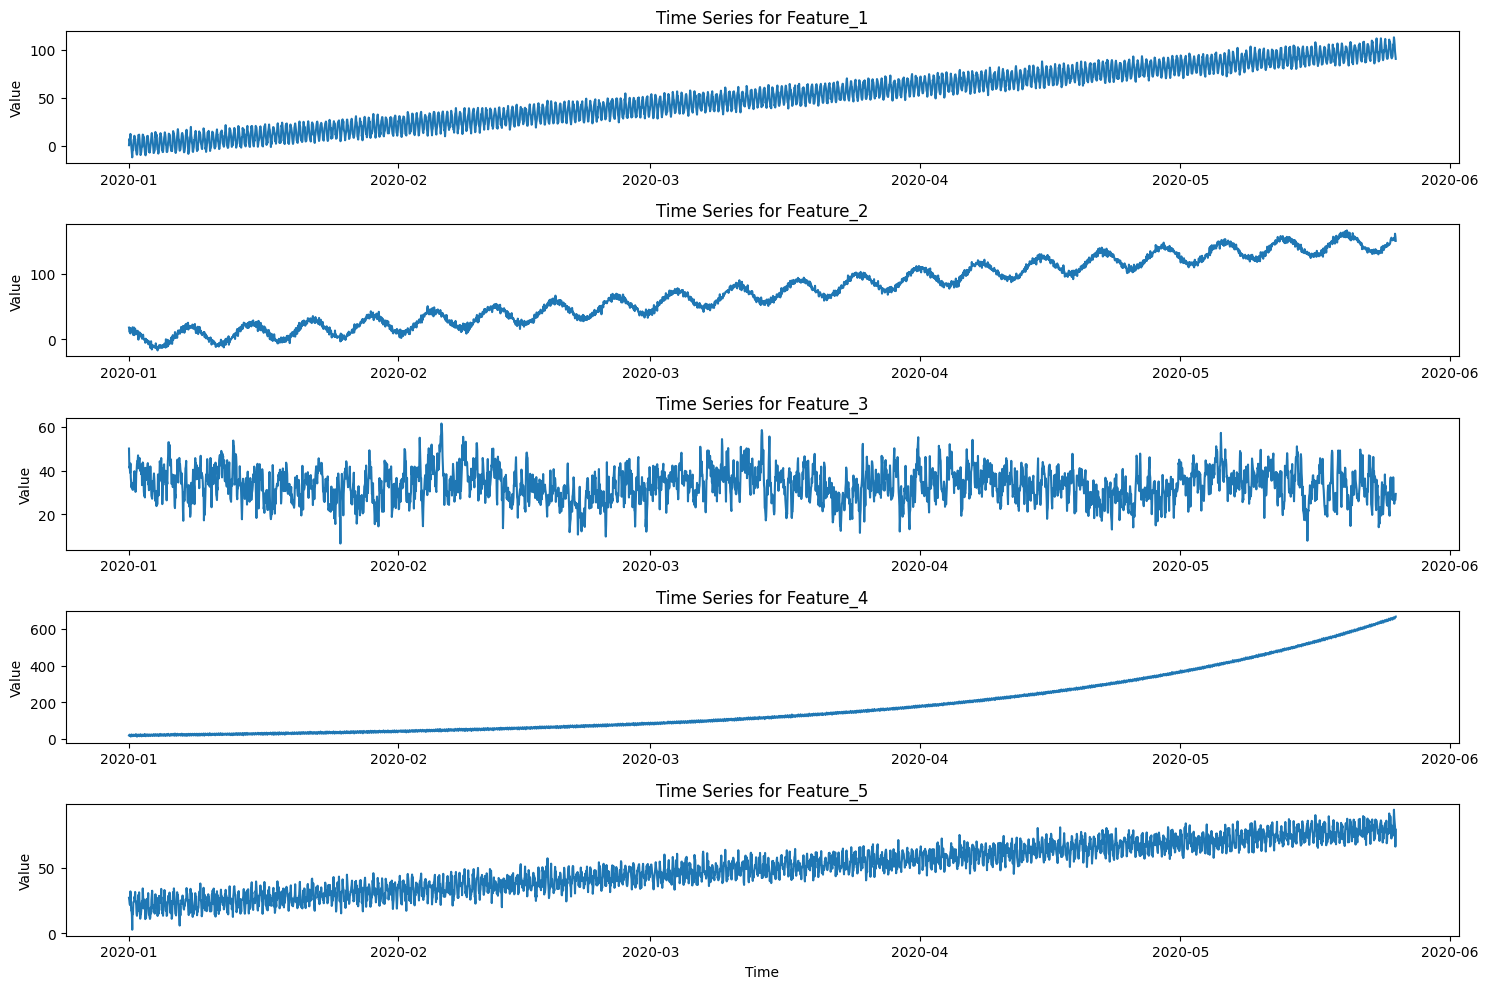

In [17]:
print(f"Generated DataFrame shape: {df_time_series.shape}")
print("First 5 rows of the generated DataFrame:")
print(df_time_series.head())
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_time_series.columns):
    plt.subplot(5, 1, i+1)
    plt.plot(df_time_series.index, df_time_series[col])
    plt.title(f'Time Series for {col}')
    plt.ylabel('Value')
plt.xlabel('Time')
plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler
print("Sum of null values per column before preprocessing:")
print(df_time_series.isnull().sum())
df_time_series_processed = df_time_series.copy()
df_time_series_processed['hour'] = df_time_series_processed.index.hour
df_time_series_processed['day_of_week'] = df_time_series_processed.index.dayofweek
df_time_series_processed['day_of_year'] = df_time_series_processed.index.dayofyear
df_time_series_processed['month'] = df_time_series_processed.index.month
df_time_series_processed['year'] = df_time_series_processed.index.year
print("\nDataFrame with new temporal features (first 5 rows):")
print(df_time_series_processed.head())
features_to_scale = df_time_series_processed.columns.tolist()
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_time_series_processed[features_to_scale])
df_scaled = pd.DataFrame(scaled_data, columns=features_to_scale, index=df_time_series_processed.index)
print("\nScaled DataFrame (first 5 rows):")
print(df_scaled.head())
print(f"Scaled DataFrame shape: {df_scaled.shape}")

Sum of null values per column before preprocessing:
Feature_1    0
Feature_2    0
Feature_3    0
Feature_4    0
Feature_5    0
dtype: int64

DataFrame with new temporal features (first 5 rows):
                     Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
2020-01-01 00:00:00   0.514114  17.583051  50.000000  19.086588  27.113142   
2020-01-01 01:00:00   7.042839  14.791720  41.263117  22.959058  25.042964   
2020-01-01 02:00:00   5.129678  10.498235  41.900126  23.526514  22.197929   
2020-01-01 03:00:00   7.834552  17.112034  39.010358  20.679357  21.511820   
2020-01-01 04:00:00  12.292536   8.651401  43.212872  14.983139  32.030680   

                     hour  day_of_week  day_of_year  month  year  
2020-01-01 00:00:00     0            2            1      1  2020  
2020-01-01 01:00:00     1            2            1      1  2020  
2020-01-01 02:00:00     2            2            1      1  2020  
2020-01-01 03:00:00     3            2            1      1  2020  
20

In [19]:
import numpy as np
look_back = 24
forecast_horizon = 12
def create_sequences(data, look_back, forecast_horizon):
    X, y = [], []
    for i in range(len(data) - look_back - forecast_horizon + 1):
        X.append(data[i:(i + look_back)])
        y.append(data[(i + look_back):(i + look_back + forecast_horizon)])
    return np.array(X), np.array(y)
data_array = df_scaled.values
X, y = create_sequences(data_array, look_back, forecast_horizon)
print(f"Shape of X (input sequences): {X.shape}")
print(f"Shape of y (target sequences): {y.shape}")
total_samples = len(X)
train_split = int(0.70 * total_samples)
val_split = int(0.15 * total_samples)
X_train, y_train = X[:train_split], y[:train_split]
X_val, y_val = X[train_split:train_split + val_split], y[train_split:train_split + val_split]
X_test, y_test = X[train_split + val_split:], y[train_split + val_split:]

Shape of X (input sequences): (3465, 24, 10)
Shape of y (target sequences): (3465, 12, 10)


In [20]:
print(f"\nX_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (2425, 24, 10)
y_train shape: (2425, 12, 10)
X_val shape: (519, 24, 10)
y_val shape: (519, 12, 10)
X_test shape: (521, 24, 10)
y_test shape: (521, 12, 10)


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed

In [22]:
num_features = X_train.shape[2]
input_shape = (look_back, num_features)
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=input_shape))
model.add(LSTM(units=100, return_sequences=True))
model.add(TimeDistributed(Dense(units=num_features)))
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())

C:\Users\pjoth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 24, 100)        │        44,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 24, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 24, 10)         │         1,010 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,810 (491.45 KB)

 Trainable params: 125,810 (491.45 KB)

 Non-trainable params: 0 (0.00 B)

None


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
model = tf.keras.models.load_model('best_model.keras')
print("Best model loaded successfully.")
y_pred_scaled = model.predict(X_test)
print(f"Shape of scaled predictions (y_pred_scaled): {y_pred_scaled.shape}")
y_test_reshaped = y_test.reshape(-1, num_features)
print(f"Shape of y_test reshaped for inverse transform: {y_test_reshaped.shape}")
y_test_original = scaler.inverse_transform(y_test_reshaped)
print(f"Shape of original true values (y_test_original): {y_test_original.shape}")
y_pred_reshaped = y_pred_scaled.reshape(-1, num_features)
print(f"Shape of y_pred reshaped for inverse transform: {y_pred_reshaped.shape}")
y_pred_original = scaler.inverse_transform(y_pred_reshaped)
print(f"Shape of original predictions (y_pred_original): {y_pred_original.shape}")
num_test_samples = X_test.shape[0]
y_test_original = y_test_original.reshape(num_test_samples, forecast_horizon, num_features)
y_pred_original = y_pred_original.reshape(num_test_samples, forecast_horizon, num_features)
print(f"Shape of y_test_original after reshape: {y_test_original.shape}")
print(f"Shape of y_pred_original after reshape: {y_pred_original.shape}")
rmse_per_feature = []
mae_per_feature = []
feature_names = df_scaled.columns.tolist()
print("\n--- Evaluation Metrics ---")
for i, feature_name in enumerate(feature_names):
    y_true_feature = y_test_original[:, :, i].flatten() 
    y_pred_feature = y_pred_original[:, :, i].flatten()
    rmse = np.sqrt(mean_squared_error(y_true_feature, y_pred_feature))
    mae = mean_absolute_error(y_true_feature, y_pred_feature)
    rmse_per_feature.append(rmse)
    mae_per_feature.append(mae)
    print(f"Feature '{feature_name}': RMSE = {rmse:.4f}, MAE = {mae:.4f}")
overall_rmse = np.mean(rmse_per_feature)
overall_mae = np.mean(mae_per_feature)
print(f"\nOverall Average RMSE across all features: {overall_rmse:.4f}")
print(f"Overall Average MAE across all features: {overall_mae:.4f}")

Best model loaded successfully.
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step
Shape of scaled predictions (y_pred_scaled): (521, 12, 10)
Shape of y_test reshaped for inverse transform: (6252, 10)
Shape of original true values (y_test_original): (6252, 10)
Shape of y_pred reshaped for inverse transform: (6252, 10)
Shape of original predictions (y_pred_original): (6252, 10)
Shape of y_test_original after reshape: (521, 12, 10)
Shape of y_pred_original after reshape: (521, 12, 10)

--- Evaluation Metrics ---
Feature 'Feature_1': RMSE = 5.7359, MAE = 4.6420
Feature 'Feature_2': RMSE = 6.1478, MAE = 4.8812
Feature 'Feature_3': RMSE = 7.9626, MAE = 6.3620
Feature 'Feature_4': RMSE = 110.3335, MAE = 99.2267
Feature 'Feature_5': RMSE = 4.6248, MAE = 3.7065
Feature 'hour': RMSE = 1.0066, MAE = 0.6147
Feature 'day_of_week': RMSE = 0.3976, MAE = 0.2031
Feature 'day_of_year': RMSE = 2.8561, MAE = 2.1981
Feature 'month': RMSE = 0.2203, MAE = 0.1881
Feature 'year': RMSE = 0.0144, MAE = 0.0100

Overall Av

In [24]:
import tensorflow as tf
import numpy as np
xai_test_samples = X_test[0:3]

In [25]:
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of xai_test_samples: {xai_test_samples.shape}")
baseline = tf.zeros_like(xai_test_samples[0:1])
print(f"Shape of baseline: {baseline.shape}")

Shape of X_test: (521, 24, 10)
Shape of xai_test_samples: (3, 24, 10)
Shape of baseline: (1, 24, 10)


In [26]:
import tensorflow as tf
import numpy as np
@tf.function
def integrated_gradients(inputs, baseline, model, target_index, target_feature_idx, m_steps=50):
    inputs = tf.cast(inputs, tf.float32)
    baseline = tf.cast(baseline, tf.float32)
    alphas = tf.cast(tf.linspace(start=0.0, stop=1.0, num=m_steps + 1), tf.float32)
    inputs_expanded = tf.expand_dims(inputs, axis=0)
    baseline_expanded = tf.expand_dims(baseline, axis=0)
    interpolated_inputs = baseline_expanded + alphas[:, tf.newaxis, tf.newaxis, tf.newaxis] * (inputs_expanded - baseline_expanded)
    interpolated_inputs = tf.squeeze(interpolated_inputs, axis=1)
    with tf.GradientTape() as tape:
        tape.watch(interpolated_inputs)
        predictions = model(interpolated_inputs)
        target_output = predictions[:, target_index, target_feature_idx]
    gradients = tape.gradient(target_output, interpolated_inputs)
    avg_gradients = tf.reduce_mean(gradients, axis=0) 
    attributions = (inputs - baseline[0]) * avg_gradients
    return attributions
all_attributions = []
target_forecast_timestep = 0 
target_feature_to_explain_idx = 0 
print(f"\nCalculating Integrated Gradients for target: timestep {target_forecast_timestep+1}, feature '{feature_names[target_feature_to_explain_idx]}'...")
xai_test_samples = tf.cast(xai_test_samples, tf.float32)
baseline = tf.cast(baseline, tf.float32)
for i, sample in enumerate(xai_test_samples):
    attributions = integrated_gradients(
        sample,
        baseline,
        model,
        target_forecast_timestep,
        target_feature_to_explain_idx
    )
    all_attributions.append(attributions)
    print(f"Attributions calculated for sample {i+1}. Shape: {attributions.shape}")
all_attributions_np = np.array(all_attributions)
print(f"\nShape of all_attributions_np: {all_attributions_np.shape}")


Calculating Integrated Gradients for target: timestep 1, feature 'Feature_1'...
Attributions calculated for sample 1. Shape: (24, 10)
Attributions calculated for sample 2. Shape: (24, 10)
Attributions calculated for sample 3. Shape: (24, 10)

Shape of all_attributions_np: (3, 24, 10)



--- Visualizing Integrated Gradients Attributions ---


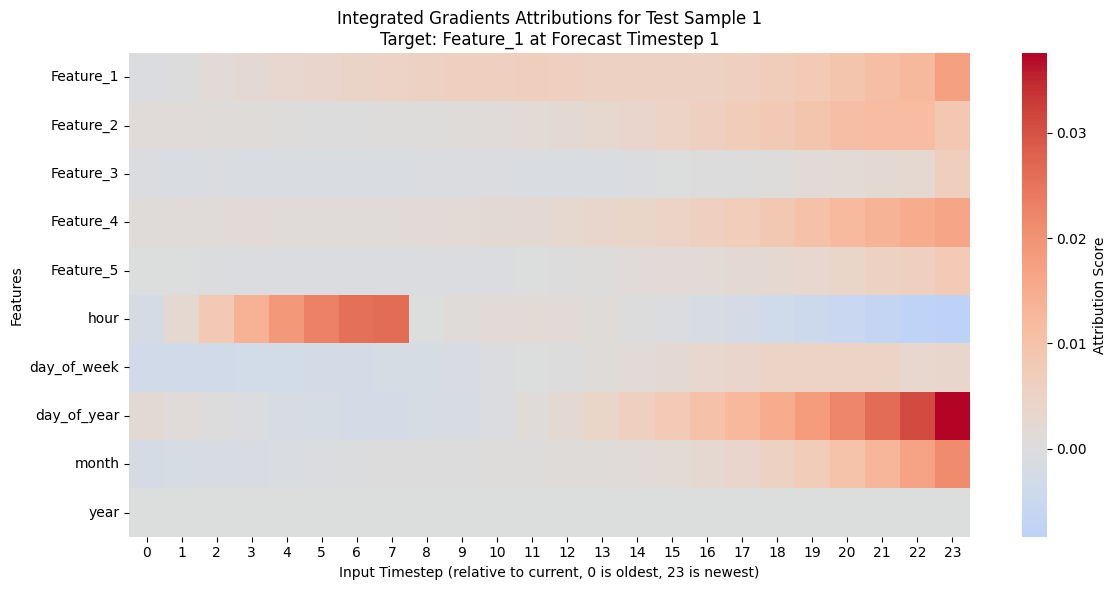

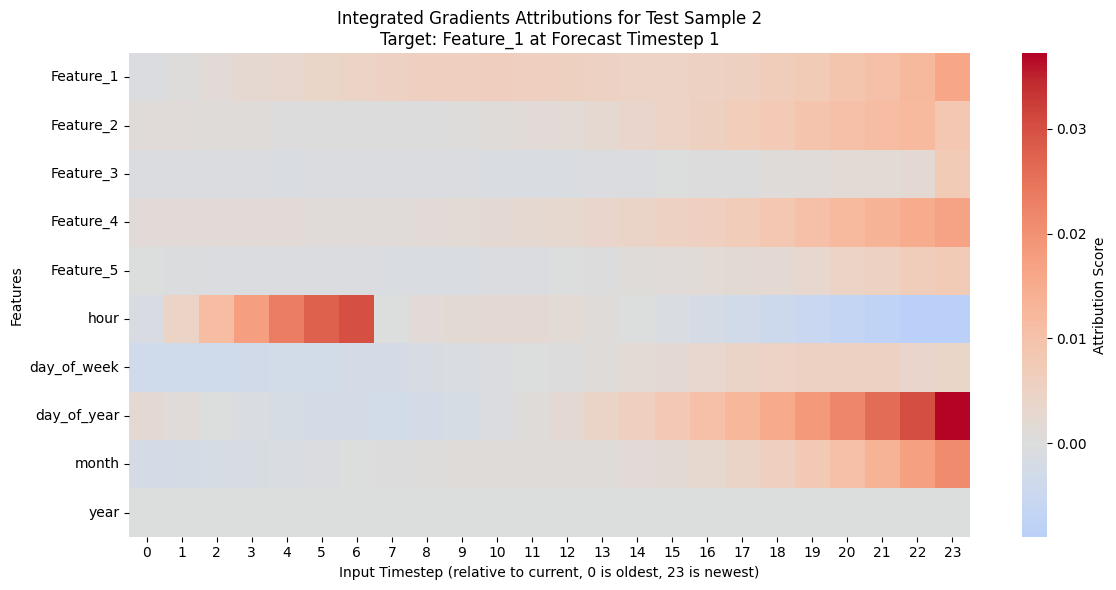

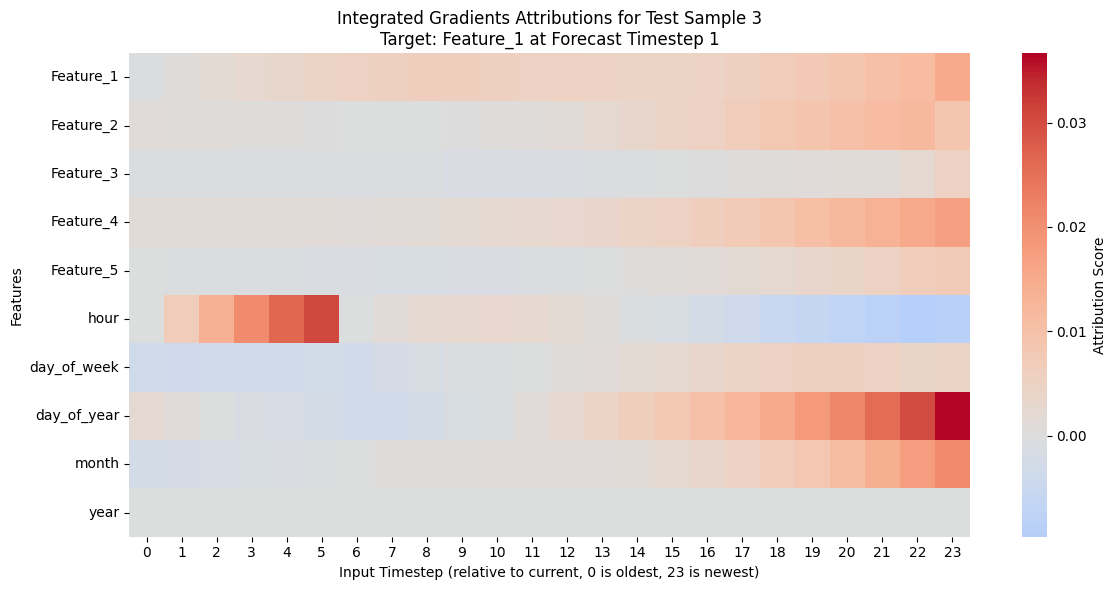

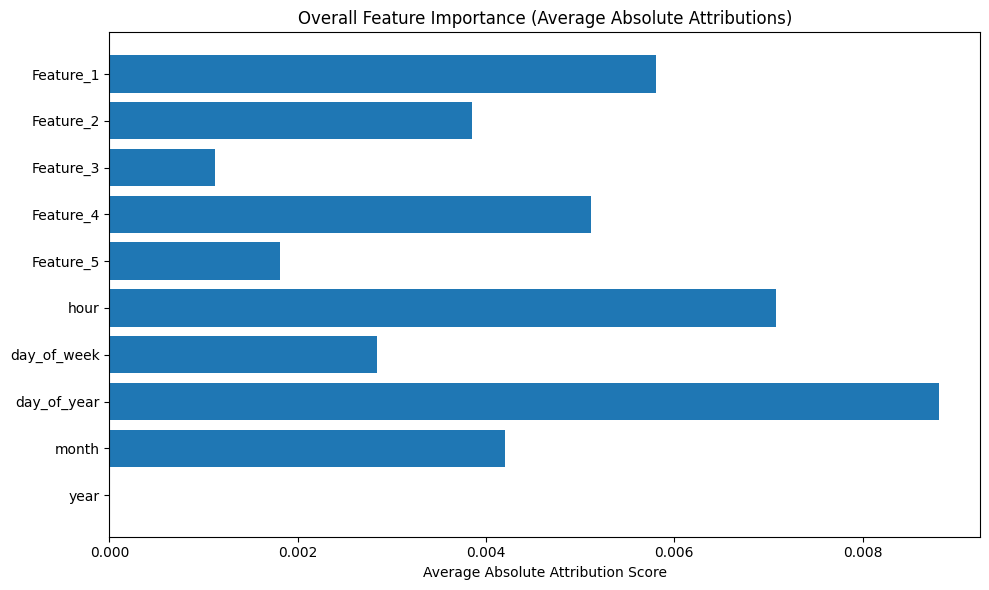

Attribution visualization complete.


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
print("\n--- Visualizing Integrated Gradients Attributions ---")
for i, attributions in enumerate(all_attributions_np):
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        attributions.T,
        cmap='coolwarm', 
        center=0,       
        yticklabels=feature_names, 
        cbar_kws={'label': 'Attribution Score'}
    )
    plt.title(f'Integrated Gradients Attributions for Test Sample {i+1}\nTarget: {feature_names[target_feature_to_explain_idx]} at Forecast Timestep {target_forecast_timestep+1}')
    plt.xlabel('Input Timestep (relative to current, 0 is oldest, 23 is newest)')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()
mean_abs_attributions = np.mean(np.abs(all_attributions_np), axis=(0, 1))
plt.figure(figsize=(10, 6))
plt.barh(feature_names, mean_abs_attributions)
plt.xlabel('Average Absolute Attribution Score')
plt.title('Overall Feature Importance (Average Absolute Attributions)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
print("Attribution visualization complete.")